# Машинное обучение (ДВФУ)

## Домашнее задание 4 (10 баллов)

### Дедлайн: 4 апреля, 23:59

Домашнее задание состоит из трёх частей. Каждое задание в каждой части оценивается в 1 балл, кроме единственного задания третьей части – оно оценивается в 1 балл + 1 бонусный балл (то есть максимально за домашнее задание можно получить 11 баллов; баллы выше 10 так и пойдут в формулы оценок). 

### Про задание

1. Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`.

2. Гуглите как можно больше! Если у вас появляется какой-то вопрос про использование метода numpy, скорее всего, на него уже есть ответ в Google – главное, правильно задать вопрос! Использование поисковика резко поощряется. 

3. Плагиат не допускается (нельзя просто так списать у друга). **НО:** можно использовать **любую** информацию из открытых Интернет-источников с указанием ссылки на них. Правила оформления из ДЗ 1 сохраняются.

4. Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.


---

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Часть 1: Основы построения решающие дерева (3 балла)

В этой части все расчёты необходимо реализовывать в виде запрограммированных формул, например, на `numpy`. **Нельзя использовать готовые реализации**. Например, если в задании требуется рассчитать энтропию, то требуется в каком-то виде релизовать расчёт по формуле, но нельзя использовать готовую реализацию `some_module.entropy()`. 

**Задание 1:** Пусть известно, что в вершину решающего дерева попали 10 объектов, 8 из которых имеют метку класса $k_1$, а 2 – метку $k_2$. Посчитайте энтропию такого распределения классов (с натуральным логарифмом). Ответ округлите до двух знаков после запятой.

In [52]:
import math
K = 10
k1 = 8
k2 = 2
p1 = k1/K
p2 = k2/K
H = -(p1 * np.log(p1) + p2 * np.log(p2)).round(2)

print('Энтропия = ', H)

Энтропия =  0.5


**Задание 2:** Пусть дополнительно известно, что вершина из предыдущего задания не является листовой и возможно такое разбиение, что в левое поддерево попадут все объекты класса $k_1$, а в правое - класса $k_2$. Посчитайте критерий информативности:

$$
Q(R_m, j, t) = H(R_m) - \frac{|R_\ell|}{|R_m|}H(R_\ell) - \frac{|R_r|}{|R_m|}H(R_r),
$$

где $R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения, $R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

Теперь в качестве $H(R)$ будем использовать индекс Джини:

$$
H(R) = \sum_k p_k(1-p_k)
$$

 Ответ округлите до двух знаков после запятой.

In [54]:
p1 = k1/K
p2 = k2/K
Hm = (p1 * (1 - p1) + p2 * (1 - p2))
Hl = 0 #поскольку в левое поддерево попадают все объекты одного класса, а в правое - другого.
Hr = 0

Q = Hm - np.abs(k1/K)*Hl - np.abs(k2/K)*Hr
Q = Q.round(2)
print('Критерий информативности = ', Q)

Критерий информативности =  0.32


**Задание 3:** Пусть при построении дерева образовалась листовая вершина с 10 объектами, значения целевой переменной для которых следующие: [1, 10, 5, 18, 100, 30, 50, 61, 84, 47] (решается задача регрессии). Чему будут равны предсказания модели для этих объектов?

In [56]:
#Для модели регрессии каждому листу ставится в соответствие ответ - среднее значение, медиана или иная функция, в зависимости от функционала качества.
Y = [1, 10, 5, 18, 100, 30, 50, 61, 84, 47]
predict = np.average(Y)
predict

40.6

## Часть 2: Дереьвя, бэггинг и случайный лес (6 баллов)

В данной части будем работать [с задачей предсказания диабета у пациента](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data). Посмотрим на работу бэггинга над решающими деревьями и случайного леса, сравним их работу.

In [92]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [98]:
data = pd.read_csv('diabetes.csv')
print(f"Dataset shape: {data.shape}")
data.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Посмотрим на распределение целевой переменной

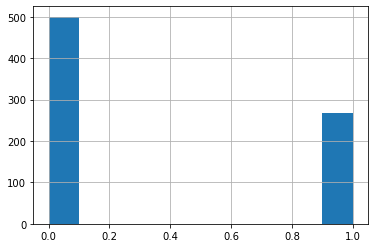

In [99]:
data['Outcome'].hist()
plt.show()

**Задание 4:** Разделите данные на признаки и целевую переменную. Разбейте датасет на обучающую и тестовую части в отношении 7:3. Затем разделите обучающую выборку на обучающую-обучающую и обучающую-валидационную в соотношении 7:3 (то есть в итоге должно получиться три выборки: обучающая-обучающая (0.49 от исходного датасета), обучающая-валидационная (0.21 от исходного датасета) и тестовая (0.3 от исходного датасета).

In [100]:
y = data['Outcome']
x = data.drop ("Outcome", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_obuch, x_valid, y_obuch, y_valid = train_test_split(x_train, y_train, test_size = 0.3)

In [101]:
x_obuch.shape, x_valid.shape, x_test.shape, x_train.shape

((375, 8), (162, 8), (231, 8), (537, 8))

**Задание 5:** На обучающей-валидационной выборке подберите оптимальные значения гиперпараметров `max_depth` и `min_samples_leaf` для `DecisionTreeClassifier`. Для этого:
1. Создайте списки с возможными значениями для перебора.
2. Для каждой пары значений обучите дерево на обучающей-обучающей выборке и определите качество на обучающей-валидационной выборке. В качестве критерия будем использовать `f1-меру`.
3. Выберите ту пару значений, которая даёт наилучшее качество на обучающей-валидационной выборке. 


Обучите решающее дерево с подобранными гиперпараметрами на **полной обучающей** выборке. Оцените качество классификации на тестовой выборке по метрикам `accuracy`, `precision` и `recall`, `auc_roc`.

In [102]:
maxdepth = range(1, 9)
samplesleaf = range(1, 9)
f1 = []                   

for dep in maxdepth:
    for leaf in samplesleaf:
        dt = DecisionTreeClassifier (max_depth = dep, min_samples_leaf = leaf, random_state = 13)
        dt.fit (x_obuch, y_obuch)
        y_dt_pred = dt.predict(x_valid)
        F1 = f1_score(y_valid, y_dt_pred)
        print ('f1: ', F1, 'max_depth =', dep, 'min_samples_leaf', leaf)
        f1.append(F1)
print('max f1',np.max(f1))

f1:  0.5063291139240506 max_depth = 1 min_samples_leaf 1
f1:  0.5063291139240506 max_depth = 1 min_samples_leaf 2
f1:  0.5063291139240506 max_depth = 1 min_samples_leaf 3
f1:  0.5063291139240506 max_depth = 1 min_samples_leaf 4
f1:  0.5063291139240506 max_depth = 1 min_samples_leaf 5
f1:  0.5063291139240506 max_depth = 1 min_samples_leaf 6
f1:  0.5063291139240506 max_depth = 1 min_samples_leaf 7
f1:  0.5063291139240506 max_depth = 1 min_samples_leaf 8
f1:  0.5063291139240506 max_depth = 2 min_samples_leaf 1
f1:  0.5063291139240506 max_depth = 2 min_samples_leaf 2
f1:  0.5063291139240506 max_depth = 2 min_samples_leaf 3
f1:  0.5063291139240506 max_depth = 2 min_samples_leaf 4
f1:  0.5063291139240506 max_depth = 2 min_samples_leaf 5
f1:  0.5063291139240506 max_depth = 2 min_samples_leaf 6
f1:  0.5063291139240506 max_depth = 2 min_samples_leaf 7
f1:  0.5063291139240506 max_depth = 2 min_samples_leaf 8
f1:  0.4473684210526316 max_depth = 3 min_samples_leaf 1
f1:  0.4473684210526316 max_dep

#### Наибольшее качество показывает дерево, в котором max_depth = 5, min_samples_leaf = 5. F1 - мера в этом случае - 0.6667.

In [107]:
Tree =  DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 5,  random_state = 13)
Tree.fit(x_train, y_train)
y_tree_predict = Tree.predict(x_test)
y_tree_roc = Tree.predict_proba(x_test)[:, 1]

print ('Accuracy =', accuracy_score(y_test, y_tree_predict))
print ('Precision =', precision_score(y_test, y_tree_predict))
print ('Recall = ', recall_score(y_test, y_tree_predict))
print ('AUC_ROC = ', roc_auc_score(y_test, y_tree_roc))

Accuracy = 0.7489177489177489
Precision = 0.7192982456140351
Recall =  0.4939759036144578
AUC_ROC =  0.8198062520351678


**Задание 6:** Обучите [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на 50 деревьях на **полной обучающей** выборке. Оцените качество классификации на тестовой выборке по тем же метрикам.

In [108]:
bc = BaggingClassifier(n_estimators = 50, random_state = 13)
bc.fit(x_train, y_train)
y_bc_predict = bc.predict(x_test)
y_bc_roc = bc.predict_proba(x_test)[:, 1]

print('Accuracy =', accuracy_score (y_test, y_bc_predict))
print('Precision =', precision_score (y_test, y_bc_predict))
print('Recall =', recall_score (y_test, y_bc_predict))
print('AUC_ROC = ', roc_auc_score (y_test, y_bc_roc))

Accuracy = 0.7792207792207793
Precision = 0.7285714285714285
Recall = 0.6144578313253012
AUC_ROC =  0.8390589384565289


**Задание 7:** Выполните кросс-валидацию на полной обучающей выборке и подберите оптимальные значения гиперпараметров `max_depth` и `min_samples_split` для `Random Forest` с 50 деревьями. Для этого:

1. Создайте списки с возможными значениями для перебора.
2. Для каждой пары значений проведите кросс-валидацию на полной обучающей выборке. Количество разбиений выберите на ваш вкус. В качестве критерия будем использовать `f1-меру`. Усредните значение критерия по всем прогонам кросс-валидации. 
3. Выберите ту пару значений, которая даёт наилучшее среднее качество. 

Обучите случайный лес с подобранными гиперпараметрами на **полной обучающей** выборке. Оцените качество классификации по тем же метрикам. Какая из трёх построенных моделей показала себя лучше?

In [109]:
# https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(n_estimators = 50, random_state = 13)
rfc_list = {'max_depth': range(1, 9), 'min_samples_split': range(1, 9)}
rfc_1 = GridSearchCV(rfc, rfc_list, cv = 4)
rfc_1.fit(x_train, y_train)
rfc_1.best_params_, rfc_1.best_score_

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.65924544 0.65924544 0.65924544 0.65924544 0.65924544
 0.65924544 0.65924544        nan 0.74304865 0.74304865 0.74304865
 0.74304865 0.74304865 0.74304865 0.74304865        nan 0.75981205
 0.75981205 0.75794638 0.75794638 0.75794638 0.75794638 0.75608071
        nan 0.7616639  0.76538143 0.77470978 0.77469596 0.77097844
 0.76726092 0.77096462        nan 0.76915423 0.76916805 0.77845495
 0.76914041 0.77097844 0.75981205 0.7747236         nan 0.78033444
 0.76915423 0.75983969 0.77287175 0.75985351 0.76730238 0.7710199
        nan 0.76914041 0.77657546 0.76915423 0.76912659 0.76916805
 0.76728856 0.76914041        nan 0.75797402 0.76540907 0.77099226
 0.78029298 0.77473742 0.77288557 0.77845495]
  warnings.warn(


({'max_depth': 6, 'min_samples_split': 2}, 0.7803344389165284)

In [110]:
rf = RandomForestClassifier(n_estimators = 50, max_depth = 6, min_samples_split = 2, random_state= 13)
rf.fit(x_train, y_train)
y_rf_predict = rf.predict(x_test)
y_rf_auc = rf.predict_proba(x_test)[:, 1]

print ('Accuracy =', accuracy_score(y_test, y_rf_predict))
print ('Precision =', precision_score(y_test, y_rf_predict))
print ('Recall =', recall_score(y_test, y_rf_predict))
print ('AUC_ROC =', roc_auc_score(y_test, y_rf_auc))

Accuracy = 0.7835497835497836
Precision = 0.7704918032786885
Recall = 0.5662650602409639
AUC_ROC = 0.8482578964506675


####

**Комментарий:** в заданиях 5 и 7 приведены две популярные стратегии подбора гиперпараметров: (1) на отдельной валидационной выборке и (2) на кросс-валидации по обучающей выборке.

**Задание 8:** Постройте график зависимости AUC ROC на тестовой выборке от числа деревьев (`n_estimators`) для случайного леса, обучаемого на **полной обучающей** выборке. Какие выводы можно сделать?

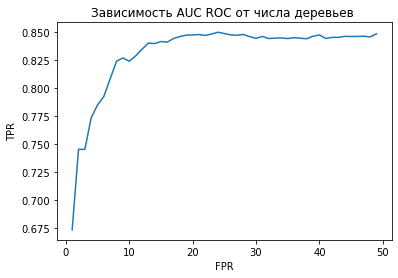

In [111]:
from sklearn.metrics import roc_curve
n_estimators = range (1, 50)
AUC_ROC = [] 

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators = n, max_depth = 6, min_samples_split = 2, random_state= 13)
    rf.fit(x_train, y_train)
    rf_pr_roc = rf.predict_proba(x_test)[:, 1]
    auc_roc = roc_auc_score(y_test, rf_pr_roc)  
    AUC_ROC.append(auc_roc)

plt.plot(n_estimators, AUC_ROC)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Зависимость AUC ROC от числа деревьев ')
plt.show()

####

**Задание 9:** Для лучшей модели случайного леса из задания 7 посчитайте важность признаков и постройте bar plot. Какой признак оказался самым важным для определения диабета? Приведите возможное объяснение.

In [2]:
Rf = RandomForestClassifier(n_estimators = 50, max_depth = 6, min_samples_split = 2, random_state = 13)
Rf.fit(x_train, y_train)
X = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DPF', 'Age']

plt.figure(figsize = (15, 10))
plt.bar(X, Rf.feature_importances_)

NameError: name 'RandomForestClassifier' is not defined

## Часть 3: Творческая часть (1 балл + 1 бонусный балл)

Поработаем с задачей про задержки самолётов. На основании доступных данных о рейсе вам нужно определить, будет ли он задержан на 15 минут.
Воспользуйтесь любыми методами градиентного бустинга (`XGboost`, `catboost`, `LightGBM`). 1 балл ставится за преодоление порога `roc_auc_score` **0.72** и ещё 1 бонусный балл за преодоление порога **0.74** на выборке `test` ниже.

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering/flight_delays_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering/flight_delays_test.csv')

In [ ]:
train.head()

In [ ]:
# Пример

from xgboost.sklearn import XGBClassifier

X_train = train[['Distance', 'DepTime']].values
y_train = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_test = test[['Distance', 'DepTime']].values
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3)

xgb = XGBClassifier()
xgb_model.fit(X_train_part, y_train_part)
roc_auc_score(y_valid, xgb_model.predict_proba(X_valid)[:, 1])